# **Jandy - Research Project Midway Checkpoint | CPSC 368**

Group members: Jaden Lai, Andy Hong

## Summary

This research project analyzes loneliness trends among Canadians aged 15 and over during the COVID-19 pandemic (2021–2023). We compare the percentage of Canadians experiencing varying levels of loneliness (by sex and overall) with key health indicators, including anxiety disorders, mood disorders, occasional/daily smoking, cannabis use, and perceived health. The goal is to identify potential associations between loneliness and these health factors, thereby providing insights into the pandemic's impact on Canadians’ mental and physical well-being.

## Research Questions for Investigation

##### Question 1
Our first research question of interest is as follows: How are levels of loneliness associated with mood and anxiety disorders among Canadians aged 15 and over during the COVID-19 Pandemic, and to what extent does this association vary by gender?

Methodology:
- Use Government Canada survey data from 2021–2023, with coverage on respondent's loneliness from different sociodemographic groups (sex, visible minority/non-minority etc.).
- Use Statistics Canada survey data from 2021-2023 which contains percentage of Canadians with mood and anxiety disorders
- Conduct multiple regression analyses to examine the relationship between loneliness and mental health outcomes.
- Include interaction terms to test whether the strength or direction of the association differs by gender.
- Analyze trends over time to assess changes over the course of the pandemic.

##### Question 2
Our second question is: How are loneliness levels associated with substance use behaviors such as cannabis use and smoking among Canadian adults, and are there gende-specific differences in these associations?

Methodology:
- Utilize loneliness measures for men and women from 2021–2023.
- Use Statistics Canada survey data from 2021-2023 which contains  percentage of Canadians who claimed they were substance users (cannabis use and smoking).
- Develop separate regression models for each gender to examine the predictive relationship between loneliness and substance use.
- Compare effect sizes and interaction terms to reveal gender-specific differences.

##### Question 3
Our final question of interest is: How do loneliness levels differ between visible minority and non-visible minority populations in Canada, and how are these differences related to the prevalence of mental health disorders and substance use behaviors?

Methodology:
- Use Government Canada survey data from 2021–2023, with coverage on respondent's loneliness from different sociodemographic groups (sex, visible minority/non-minority etc.).
- Use Statistics Canada survey data from 2021-2023 which contains percentage of Canadians with mood and anxiety disorders, and substance users.
- Perform stratified analyses to compare average loneliness scores between visible and non-visible minority groups.
- Utilize multivariable regression models to assess the associations between loneliness and both mental health outcomes and substance use
- Include interaction terms to explore whether the strength of associations differs by minority status.


#### Justification for Changes to Initial Research Questions

After discussing with our project TA, we have ultimately decided to revise our research questions and focus.

##### Old Research Question and Goal:

Compare the habitual impact of the pandemic on vaping usage before 2020 (pre-pandemic) and after 2020 (post-pandemic), as well as the impact of the COVID-19 pandemic on drugs and substance abuse for youth and adults. 

Our new research questions were inspired by our initial ideas on the impact of COVID-19 on the mental well-being of Canadians. Our TA suggested that this was a plausible and interesting direction for the project. With our revised questions, we successfully identified data that could potentially be used to answer them.

##### Reason for Change:

We did not find clear relationships between vaping habits and hospitalization rates due to substance abuse, or between vaping habits and youth mortality rates. Additionally, the structure of the data in our previous proposal was problematic. The old datasets, which consisted of pivot tables, could not be easily ingested into a database for the scope of this project.


## Data Cleaning : Loneliness Data

In [29]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [30]:
# Reading the dataset
lonely_df = pd.read_csv('LonlinessData.csv')
lonely_df.head()

,REF_DATE,GEO,DGUID,Gender,Sociodemographic characteristics,Indicators,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2021-07,Canada (excluding territories),2016A000011124,"Total, all persons","Total, 15 years and over",Always or often feels lonely,Percentage of persons,Percent,239,units,0,v1331412664,1.1.4.1.1,13.0,NaN,NaN,NaN,1
1,2021-07,Canada (excluding territories),2016A000011124,"Total, all persons","Total, 15 years and over",Always or often feels lonely,"Lower bound of the 95% confidence interval, pe...",Percent,239,units,0,v1331412665,1.1.4.1.2,12.2,NaN,NaN,NaN,1
2,2021-07,Canada (excluding territories),2016A000011124,"Total, all persons","Total, 15 years and over",Always or often feels lonely,"Upper bound of the 95% confidence interval, pe...",Percent,239,units,0,v1331412666,1.1.4.1.3,13.9,NaN,NaN,NaN,1
3,2021-07,Canada (excluding territories),2016A000011124,"Total, all persons","Total, 15 years and over",Always or often feels lonely,Number of persons,Number,223,thousands,3,v1331412667,1.1.4.1.4,4050.0,NaN,NaN,NaN,0
4,2021-07,Canada (excluding territories),2016A000011124,"Total, all persons","Total, 15 years and over",Always or often feels lonely,"Lower bound of the 95% confidence interval, nu...",Number,223,thousands,3,v1331412668,1.1.4.1.5,3782.0,NaN,NaN,NaN,0


From the display above, we can see that many columns contain values that are not useful to our research, such as `GEO`, `UOM`, `UOM_ID`, `SCALAR_FACTOR`, `SCALAR_ID`, and `COORDINATE`. These columns are either identifiers for location  or describe what was measured. We will remove the location identifiers and scalars because we are only concerned with percentages and we are interested in looking at all of Canada.

For our research project, we are focused solely on the percent values of loneliness rather than counts (under the `UOM` column). This is because the number of participants at the time of each survey would result in several differing sample sizes which would skew our data. Therefore, choosing percentages to use in our comparison makes more sense here.

Regarding the 'Sociodemographic characteristics' column, we will filter for rows that include `["Total, 15 years and over", "Visible minority population", "Not a visible minority"]`, as these are the rows relevant to our topic. One of our research options is to study minorities, and `Total, 15 years and over` provides the overall loneliness values for each indicator and year. Other rows, such as those related to ethnicity, immigration, and separate age groups, fall outside the scope of our project.

Furthermore, we will remove the `STATUS`, `SYMBOL`, and `TERMINATED` columns, as they contain null values. Lastly, we will remove the `DECIMAL` column, as it does not provide any useful data.

Finally, the column names will be renamed to more generic terms for consistency.

In [31]:
# Select columns of interest
selected_columns = ["REF_DATE", "Gender", "Sociodemographic characteristics", "Indicators","Statistics","VALUE"]
lonely_cleaned = lonely_df[selected_columns]

# Filter for rows that measure lonliness by percentage rather than number
lonely_cleaned = lonely_cleaned.loc[lonely_cleaned["Statistics"] == "Percentage of persons"]

# Now we want to keep the statistics for the entire sample (aged 15+), visible and non-visible minorities
keep_ages = ["Total, 15 years and over", "Visible minority population", "Not a visible minority"]
lonely_cleaned = lonely_cleaned.loc[lonely_cleaned["Sociodemographic characteristics"].isin(keep_ages)]

# Rename columns to general names
lonely_cleaned = lonely_cleaned.rename(columns = {"REF_DATE" : "year","Gender" : "sex", "Indicators": "lonelyindicators", "VALUE": "percent", "Sociodemographic characteristics" : "schar"})
lonely_cleaned["yeardate"] = pd.to_datetime(lonely_cleaned["year"]).dt.year

# We rename Genders to Sex for consistency between datasets
lonely_cleaned['sex'] = lonely_cleaned['sex'].replace({'Total, all persons':'Both', "Men" : 'Male', "Women" : "Female"})

# Final selection of attributes and removal of 2024 outside of our scope interest
selected_column = ["yeardate", "sex",  "lonelyindicators", "schar", "percent"]
lonely_cleaned = lonely_cleaned[selected_column]
lonely_cleaned = lonely_cleaned.loc[lambda x: x['yeardate'] != 2024]
display(lonely_cleaned)

,yeardate,sex,lonelyindicators,schar,percent
0,2021,Both,Always or often feels lonely,"Total, 15 years and over",13.0
6,2021,Both,Sometimes feels lonely,"Total, 15 years and over",34.2
12,2021,Both,Rarely or never feels lonely,"Total, 15 years and over",52.7
324,2021,Both,Always or often feels lonely,Visible minority population,12.8
330,2021,Both,Sometimes feels lonely,Visible minority population,39.1
...,...,...,...,...,...
23280,2023,Female,Sometimes feels lonely,Visible minority population,42.4
23286,2023,Female,Rarely or never feels lonely,Visible minority population,43.2
23508,2023,Female,Always or often feels lonely,Not a visible minority,13.7
23514,2023,Female,Sometimes feels lonely,Not a visible minority,31.7


Now that our data is cleaned, it is ready for ingestion and we create a new cleaned csv file.

In [33]:
lonely_cleaned.to_csv('lonely_cleaned.csv', index= False)

## Data Cleaning: Mental Health Data

Now let's process and clean the mental health data.

First, lets load and display the data to view the structure and attributes of our data.

In [34]:
#Reading the data set
mental_df = pd.read_csv('MentalHealthData.csv')
mental_df.head()

,REF_DATE,GEO,DGUID,Age group,Sex,Indicators,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2021,Canada (excluding territories),NaN,"Total, 18 years and over",Both sexes,"Perceived health, very good or excellent",Percent,Percent,239,units,0,v1600652150,1.1.1.1.4,58.8,NaN,NaN,NaN,1
1,2022,Canada (excluding territories),NaN,"Total, 18 years and over",Both sexes,"Perceived health, very good or excellent",Percent,Percent,239,units,0,v1600652150,1.1.1.1.4,53.8,NaN,NaN,NaN,1
2,2023,Canada (excluding territories),NaN,"Total, 18 years and over",Both sexes,"Perceived health, very good or excellent",Percent,Percent,239,units,0,v1600652150,1.1.1.1.4,52.2,NaN,NaN,NaN,1
3,2021,Canada (excluding territories),NaN,"Total, 18 years and over",Both sexes,"Perceived health, fair or poor",Percent,Percent,239,units,0,v1600652158,1.1.1.2.4,11.9,NaN,NaN,NaN,1
4,2022,Canada (excluding territories),NaN,"Total, 18 years and over",Both sexes,"Perceived health, fair or poor",Percent,Percent,239,units,0,v1600652158,1.1.1.2.4,14.5,NaN,NaN,NaN,1


Once again, we only want to keep columns that are in the scope of our project. Therefore, we will remove the following columns: `GEO`, `Age group`, `Characteristics`, `UOM`, `UOM_ID`, `SCALAR_FACTOR`, `SCALAR_ID`, and `VECTOR`, as they are not relevant to our analysis.

In [35]:
#Select relevant columns
select_mental = ["REF_DATE", "Sex", "Indicators","VALUE"]
mental_cleaned = mental_df[select_mental]

#Rename to general names
mental_cleaned = mental_cleaned.rename(columns = {"REF_DATE" : "yeardate","Sex" : "sex", "Indicators": "mentalindicators", "VALUE": "percent"})
mental_cleaned['sex'] = mental_cleaned['sex'].replace({'Males':'Male', 'Females':'Female', 'Both sexes' : 'Both'})

display(mental_cleaned)

,yeardate,sex,mentalindicators,percent
0,2021,Both,"Perceived health, very good or excellent",58.8
1,2022,Both,"Perceived health, very good or excellent",53.8
2,2023,Both,"Perceived health, very good or excellent",52.2
3,2021,Both,"Perceived health, fair or poor",11.9
4,2022,Both,"Perceived health, fair or poor",14.5
...,...,...,...,...
85,2022,Female,Cannabis frequency of use in the past 12 month...,4.7
86,2023,Female,Cannabis frequency of use in the past 12 month...,4.2
87,2021,Female,Heavy drinking,13.2
88,2022,Female,Heavy drinking,17.6


Now that our data is cleaned, this is also now ready for ingestion and we create a new cleaned csv file.

In [36]:
#mental_cleaned.to_csv('mental_clean.csv', index= False)

Both cleaned csv's will be used later to produce SQL INSERT statements that allow us to replicate these in our database.

Lets compare total lonliness indicators over all years to first see any trends between male or female

## Exploratory Data Analysis (EDA)

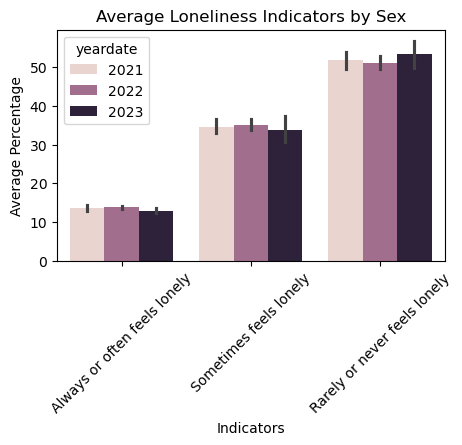

In [37]:
plt.figure(figsize=(5, 3))
sns.barplot(x='lonelyindicators', y='percent', hue='yeardate', data=lonely_cleaned)
plt.title('Average Loneliness Indicators by Sex')
plt.xlabel('Indicators')
plt.ylabel('Average Percentage')
plt.xticks(rotation=45)
plt.show()

Above displayed is the percentage corresponding to each lonely indicator over the years for both sexes. In our SQL file, we aggregated by years but we did not in our jupyter notebook (per TA instructions). This is why we see a long vertical line for each indicator. Regardless, we still have a best fit line between years that shows the change in loneliness rates. From this, we can tell that both males and females generally felt more lonely going into the year 2022, going back to regular levels in 2023.

We can do the same for mental health indicators 

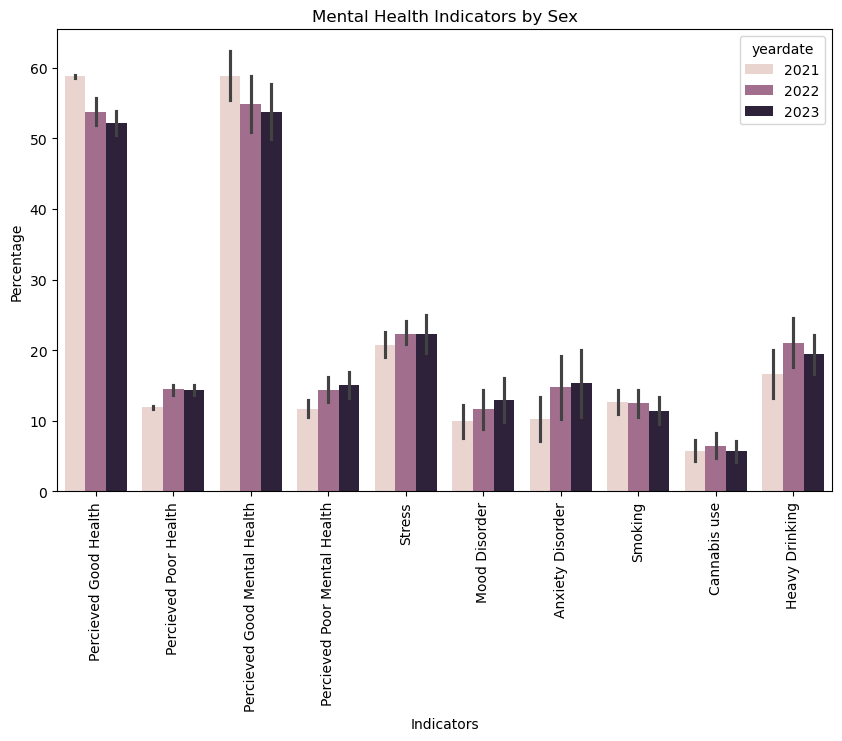

In [38]:
import textwrap
f = lambda x: textwrap.fill(x.get_text(), 10)

plt.figure(figsize=(10, 6))
sns.barplot(x='mentalindicators', y='percent', hue='yeardate', data=mental_cleaned)
plt.title('Mental Health Indicators by Sex')
plt.xlabel('Indicators')
plt.ylabel('Percentage')
#plt.xticks(rotation= 'vertical', fontsize = 5)
plt.xticks([0,1,2, 3, 4,5,6,7,8,9], [r"Percieved Good Health", r"Percieved Poor Health", r"Percieved Good Mental Health", r"Percieved Poor Mental Health", r"Stress", r"Mood Disorder", r"Anxiety Disorder", r"Smoking", r"Cannabis use", r"Heavy Drinking"], rotation = 'vertical' )
plt.show()

From above, we see that percieved good health and perceived good mental health go down from 2021 to 2022. In a similar fashion, perceived poor health and perceived poor mental health, stree, mood disorder, anxiety discorder, smoking, cannabis use, and heavy drink all went up from 2021 to 2022. Most variables continued to move towards worse 'health' into 2023, while some (cannabis use, heavy drinking) leveled back down to original levels in 2023.

From visualizations for loneliness indicators and mental health indicators, we see that loneliness and mental health both 'degrade' from 2021 and 2022, where loneliness rates went back to normal in 2023 but mental health rates often continued to degrade. This could be do to the pandemic where quarantine spiked in 2022, returning to normal in 2023. It would be beneficial and interesting to further investigate how these rates differ between various factors such as gender, minority, or even a difference between physical (substance use) rates and mental rates when compared to loneliness. This could also potentially address why smoking and alchohol, compared to the health indicators, returned to normal rates in 2023.

Lets see how these indicators between male and female compare for both our **lonliness data** and **mental heath data**


After seeing the EDA of our data, we see clear trends for the degradation of physical and mental health from the years of 2021 to 2022, and in some cases 2023 as well. This brings about one change in how we will work with our data: using a time based analysis to assess association between variables by year. Our plans in testing association between subgroups in our data, such as minority and sex, still stand as well. 

## Writing our SQL INSERT Statements from CSV

In [42]:
def print_inserts(csv_file, table_name):
    with open(csv_file, mode='r', newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)
        columns_str = ", ".join(headers)

        for row in reader:
            values = []
            for value in row:
                value = value.replace("'", "''")
                if value.replace('.', '', 1).isdigit():
                    values.append(value)
                else:
                    values.append(f"'{value}'")
            values_str = ", ".join(values)
            statement = f"INSERT INTO {table_name} ({columns_str}) VALUES ({values_str});"
            print(statement)

print_inserts('lonely_cleaned.csv', 'loneliness_percent')

INSERT INTO loneliness_percent (yeardate, sex, lonelyindicators, schar, percent) VALUES (2021, 'Both', 'Always or often feels lonely', 'Total, 15 years and over', 13.0);
INSERT INTO loneliness_percent (yeardate, sex, lonelyindicators, schar, percent) VALUES (2021, 'Both', 'Sometimes feels lonely', 'Total, 15 years and over', 34.2);
INSERT INTO loneliness_percent (yeardate, sex, lonelyindicators, schar, percent) VALUES (2021, 'Both', 'Rarely or never feels lonely', 'Total, 15 years and over', 52.7);
INSERT INTO loneliness_percent (yeardate, sex, lonelyindicators, schar, percent) VALUES (2021, 'Both', 'Always or often feels lonely', 'Visible minority population', 12.8);
INSERT INTO loneliness_percent (yeardate, sex, lonelyindicators, schar, percent) VALUES (2021, 'Both', 'Sometimes feels lonely', 'Visible minority population', 39.1);
INSERT INTO loneliness_percent (yeardate, sex, lonelyindicators, schar, percent) VALUES (2021, 'Both', 'Rarely or never feels lonely', 'Visible minority pop

In [43]:
print_inserts('mental_clean.csv', 'health_indicator_percent')

INSERT INTO health_indicator_percent (yeardate, sex, mentalindicators, percent) VALUES (2021, 'Both', 'Perceived health, very good or excellent', 58.8);
INSERT INTO health_indicator_percent (yeardate, sex, mentalindicators, percent) VALUES (2022, 'Both', 'Perceived health, very good or excellent', 53.8);
INSERT INTO health_indicator_percent (yeardate, sex, mentalindicators, percent) VALUES (2023, 'Both', 'Perceived health, very good or excellent', 52.2);
INSERT INTO health_indicator_percent (yeardate, sex, mentalindicators, percent) VALUES (2021, 'Both', 'Perceived health, fair or poor', 11.9);
INSERT INTO health_indicator_percent (yeardate, sex, mentalindicators, percent) VALUES (2022, 'Both', 'Perceived health, fair or poor', 14.5);
INSERT INTO health_indicator_percent (yeardate, sex, mentalindicators, percent) VALUES (2023, 'Both', 'Perceived health, fair or poor', 14.4);
INSERT INTO health_indicator_percent (yeardate, sex, mentalindicators, percent) VALUES (2021, 'Both', 'Perceived

## Database Schema 

loneliness_percent(<u>yeardate</u>, <u>sex</u>, <u>lonelyindicators</u>, <u>schar</u>, percent)

health_indicator_percent(<u>yeardate</u>, <u>sex</u>, <u>mentalindicators</u>, percent)

combined(**<u>yeardate</u>**, **<u>sex</u>**, **<u>lonelyindicators</u>**, **<u>mentalindicators</u>**, **lonelypercent**, **mentalpercent**)

## Declaration of AI tool

No AI tools were used in the submission of this assignment.